# k-MonteCarlo resolution example

In [1]:
import sys
import os
import random
import pickle
from networkx import Graph, erdos_renyi_graph
import networkx as nx


sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from greedy_subgraph import greedy_subgraph_solver
from classic_MIS_solvers import solve_weighted_mis, weighted_greedy_independent_set, weighted_generate_different_mis
from quantum_solver import q_solver


We create an instance to solve:

In [2]:
seed = 0

random.seed(seed)

G: Graph = erdos_renyi_graph(100,0.4,seed = seed)
for node in G.nodes():
    G.nodes[node]['weight'] = random.uniform(0, 1)

We select a resolution lattice support, provided as a dictionary where the keys represent the IDs and the values correspond to the coordinates. We also need a rydberg blockade.

In [3]:
rydberg_blockade = 6.6

with open('../data/lattices/coordinate_arrays.pickle', 'rb') as handle:
    fresnel_id_coords_dic = pickle.load(handle)

print(fresnel_id_coords_dic)


{0: array([-20.,   0.]), 1: array([-17.5     ,  -4.330127]), 2: array([-17.5     ,   4.330127]), 3: array([-15.      ,  -8.660254]), 4: array([-15.,   0.]), 5: array([-15.      ,   8.660254]), 6: array([-12.5     , -12.990381]), 7: array([-12.5     ,  -4.330127]), 8: array([-12.5     ,   4.330127]), 9: array([-12.5     ,  12.990381]), 10: array([-10.      , -17.320508]), 11: array([-10.      ,  -8.660254]), 12: array([-10.,   0.]), 13: array([-10.      ,   8.660254]), 14: array([-10.      ,  17.320508]), 15: array([ -7.5     , -12.990381]), 16: array([-7.5     , -4.330127]), 17: array([-7.5     ,  4.330127]), 18: array([-7.5     , 12.990381]), 19: array([ -5.      , -17.320508]), 20: array([-5.      , -8.660254]), 21: array([-5.,  0.]), 22: array([-5.      ,  8.660254]), 23: array([-5.      , 17.320508]), 24: array([ -2.5     , -12.990381]), 25: array([-2.5     , -4.330127]), 26: array([-2.5     ,  4.330127]), 27: array([-2.5     , 12.990381]), 28: array([  0.      , -17.320508]), 29: 

The greedy_subgraph_solver constructor receives:
- a general graph to solve, a lattice dict {id: coord}, a rydberg blockade value and a wMIS solving function (here a classical one for simplicity)

The wMIS funtion receives as input:
- A graph in which each node is labeled with a lattice ID, and each node is associated with a dictionary specifying its weight and position. For additional details, refer to the function `generate_graph_to_solve` in the `greedy_subgraph.py` file.

Then, we have a `solve` method, which takes the following parameters:

- The size threshold for subgraphs below which classical bruteforce is performed.
- The number of subgraphs to solve at each iteration.
- The number of MIS to sample for each subgraph

## With Classical Solver

In [4]:
solver = greedy_subgraph_solver(G, fresnel_id_coords_dic, rydberg_blockade, weighted_generate_different_mis)

Not_branched = solver.solve(exact_solving_threshold = 10, subgraph_quantity = 1, mis_sample_quantity = 1)

Branched = solver.solve(exact_solving_threshold = 10, subgraph_quantity = 2, mis_sample_quantity = 5)

print("Not branched solution value", solver.calculate_weight(Not_branched))
print("Branched solution value", solver.calculate_weight(Branched))
print("Greedy", solver.calculate_weight(weighted_greedy_independent_set(G)))
print("Optimal", solver.calculate_weight(solve_weighted_mis(G)))

Not branched solution value 6.445808878018891
Branched solution value 6.974911435096355
Greedy 6.368302007000004
Optimal 8.273846837996222


## With Quantum Solver

..........................
Current graph: Graph with 16 nodes and 21 edges
The quantum magic starts...
..........................
Parameters used in the quantum evolution: {'duration': 4000, 'detuning_maximum': 25.69556703816579, 'amplitude_maximum': 12.847783519082896, 'dmm_map': {32: 0.8125690751134108, 23: 0.15240631674933092, 27: 0.12625908903917427, 36: 0.5117286080430756, 41: 0.20369501469119933, 14: 0.17205672611475942, 18: 0.43035756587982854, 50: 0.18673941223659185, 40: 0.6955479654988376, 9: 0.08847604573473755, 35: 0.738529223959752, 49: 0.0, 26: 0.3293370703457795, 17: 0.07961455184892863, 5: 0.2132572933696114, 2: 0.7604877781739239}, 'dmm_detuning': -20.879423142717023}
simulation time 237.7553355693817
..........................
The quantum magic has finish
Quantum Solution for current graph: [[41, 14, 49, 17]]


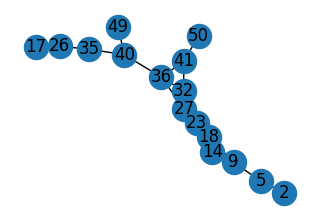

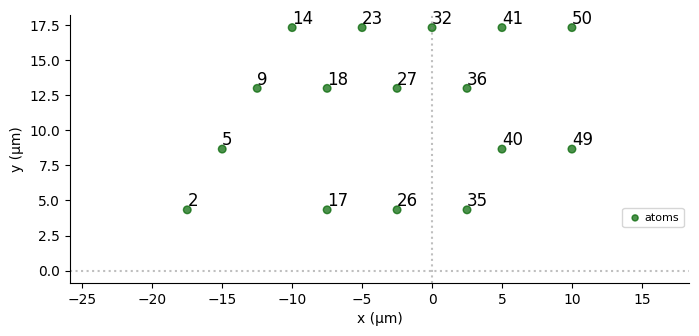

..........................
Current graph: Graph with 16 nodes and 21 edges
The quantum magic starts...
..........................
Parameters used in the quantum evolution: {'duration': 4000, 'detuning_maximum': 25.69556703816579, 'amplitude_maximum': 12.847783519082896, 'dmm_map': {32: 0.8125690751134108, 23: 0.15240631674933092, 27: 0.12625908903917427, 36: 0.5117286080430756, 41: 0.20369501469119933, 14: 0.17205672611475942, 18: 0.43035756587982854, 50: 0.18673941223659185, 40: 0.6955479654988376, 9: 0.08847604573473755, 35: 0.738529223959752, 49: 0.0, 26: 0.3293370703457795, 17: 0.07961455184892863, 5: 0.2132572933696114, 2: 0.7604877781739239}, 'dmm_detuning': -20.879423142717023}
simulation time 231.3530294895172
..........................
The quantum magic has finish
Quantum Solution for current graph: [[41, 14, 49, 17], [41, 14, 49, 26, 5], [41, 14, 49, 17, 2], [23, 41, 9, 49, 17], [41, 14, 49, 17, 5]]


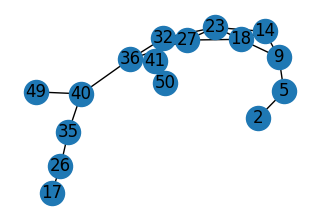

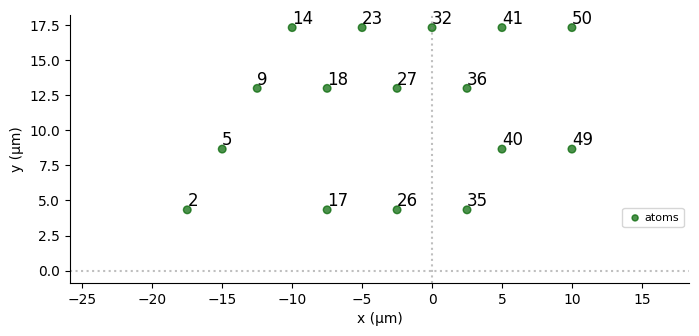

..........................
Current graph: Graph with 15 nodes and 21 edges
The quantum magic starts...
..........................
Parameters used in the quantum evolution: {'duration': 4000, 'detuning_maximum': 25.69556703816579, 'amplitude_maximum': 12.847783519082896, 'dmm_map': {32: 0.5583859362797033, 23: 0.11639130171262757, 27: 0.05380763945274247, 36: 0.12406656658126691, 41: 0.32561762458499677, 14: 0.5650500441925572, 9: 0.36779479491255185, 22: 0.0, 31: 0.3337773878119987, 26: 0.35677318023568494, 50: 0.05067935100880627, 54: 0.07908834830736511, 21: 0.8901770297841095, 12: 0.009628024762462828, 16: 0.5086237832783584}, 'dmm_detuning': -22.87360354465289}
simulation time 183.86614441871643
..........................
The quantum magic has finish
Quantum Solution for current graph: [[36, 9, 54, 12], [23, 31, 54, 12], [23, 9, 31, 54, 12], [27, 9, 54, 12], [23, 22, 54, 12]]


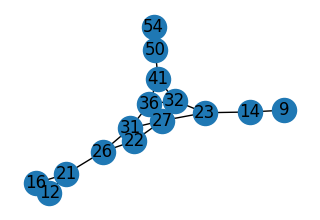

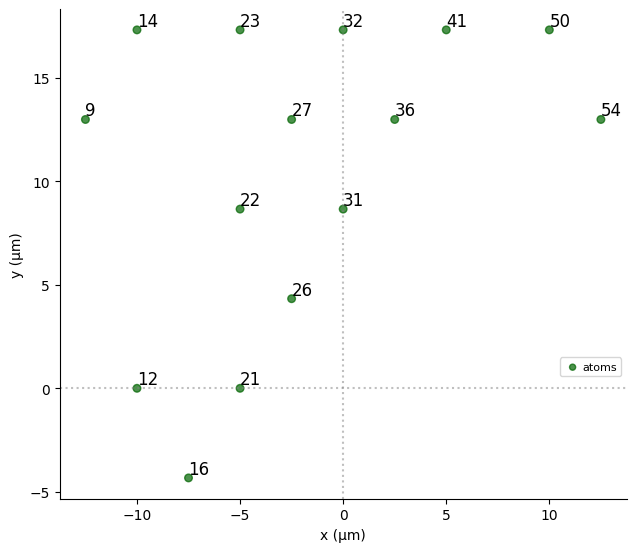

..........................
Current graph: Graph with 11 nodes and 15 edges
The quantum magic starts...
..........................
Parameters used in the quantum evolution: {'duration': 4000, 'detuning_maximum': 25.69556703816576, 'amplitude_maximum': 12.84778351908288, 'dmm_map': {32: 0.29650672491384544, 23: 0.725729685595252, 27: 0.49776014043410843, 36: 0.5947405965196279, 41: 0.03869780935269418, 40: 0.3721742313401235, 45: 0.9987967344901489, 54: 0.0, 57: 0.8851738477545799, 22: 0.4878267077684596, 13: 0.37900295098930903}, 'dmm_detuning': -25.66464844859267}
simulation time 101.4201819896698
..........................
The quantum magic has finish
Quantum Solution for current graph: [[32, 54, 13], [41, 54, 13], [32, 40, 54, 13], [32, 54, 22], [41, 54, 22]]


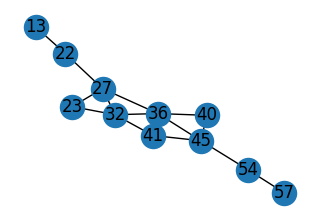

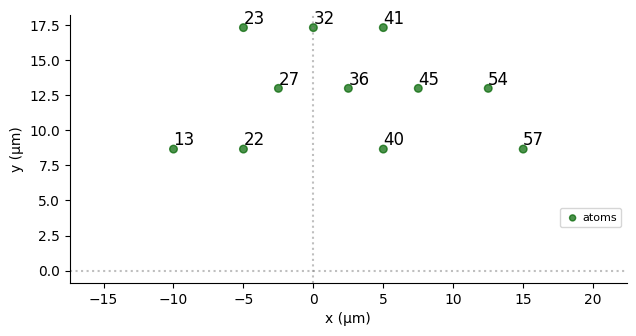

..........................
Current graph: Graph with 11 nodes and 14 edges
The quantum magic starts...
..........................
Parameters used in the quantum evolution: {'duration': 4000, 'detuning_maximum': 25.69556703816576, 'amplitude_maximum': 12.84778351908288, 'dmm_map': {32: 0.7487631567135218, 23: 0.3721742313401235, 27: 0.30483280943469215, 36: 0.03869780935269418, 41: 0.6943143397009988, 14: 0.9152992273984905, 45: 0.29650672491384544, 49: 0.725729685595252, 9: 0.05362020295699099, 5: 0.0, 22: 0.4878267077684596}, 'dmm_detuning': -23.519132657599236}
simulation time 102.39997816085815
..........................
The quantum magic has finish
Quantum Solution for current graph: [[23, 45, 5], [36, 5], [23, 36, 5], [27, 45, 5], [45, 5, 22]]


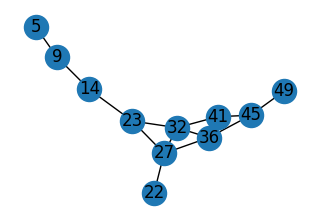

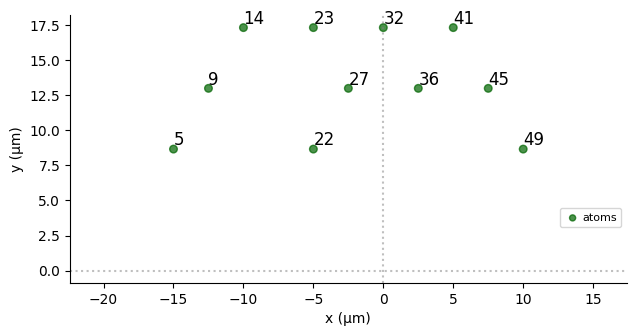

..........................
Current graph: Graph with 11 nodes and 14 edges
The quantum magic starts...
..........................
Parameters used in the quantum evolution: {'duration': 4000, 'detuning_maximum': 25.69556703816579, 'amplitude_maximum': 12.847783519082896, 'dmm_map': {32: 0.9987285595977315, 23: 0.0, 27: 0.5717793165633747, 36: 0.3366027353695248, 41: 0.734528522194287, 50: 0.8786680013624575, 40: 0.1173884170825692, 35: 0.4588078762545009, 44: 0.3438183581781711, 22: 0.2566480420606616, 13: 0.710190015402153}, 'dmm_detuning': -25.66289665607427}
simulation time 99.53302121162415
..........................
The quantum magic has finish
Quantum Solution for current graph: [[23, 40], [23, 40, 13], [23, 40, 22], [23, 44], [23, 44, 22]]


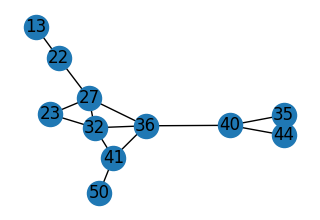

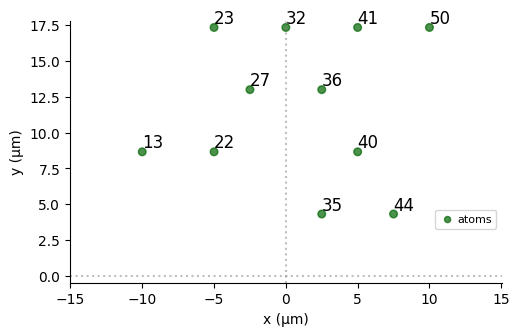

..........................
Current graph: Graph with 11 nodes and 14 edges
The quantum magic starts...
..........................
Parameters used in the quantum evolution: {'duration': 4000, 'detuning_maximum': 25.69556703816576, 'amplitude_maximum': 12.84778351908288, 'dmm_map': {32: 0.4588078762545009, 23: 0.3438183581781711, 27: 0.1173884170825692, 36: 0.46930411961967655, 22: 0.3366027353695248, 13: 0.9987285595977315, 17: 0.734528522194287, 12: 0.8786680013624575, 5: 0.0, 40: 0.710190015402153, 45: 0.2566480420606616}, 'dmm_detuning': -25.66289665607424}
simulation time 97.84925413131714
..........................
The quantum magic has finish
Quantum Solution for current graph: [[27, 5, 45], [23, 5, 45], [22, 5, 45], [23, 22, 5, 45], [23, 12, 5, 45]]


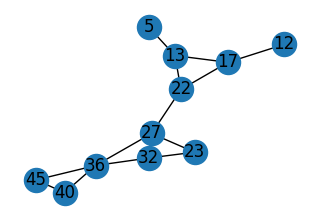

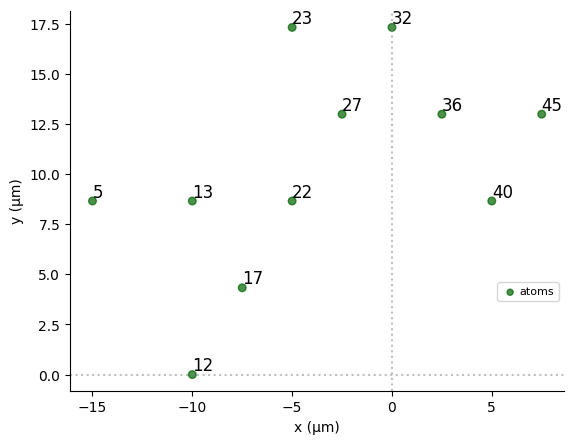

Not branched solution value 3.531369118579486
Branched solution value 7.676564590998764
Greedy 6.368302007000004
Optimal 8.273846837996222


In [5]:
solver = greedy_subgraph_solver(G, fresnel_id_coords_dic, rydberg_blockade, q_solver)

Not_branched = solver.solve(exact_solving_threshold = 10, subgraph_quantity = 1, mis_sample_quantity = 1)

Branched = solver.solve(exact_solving_threshold = 10, subgraph_quantity = 2, mis_sample_quantity = 5)

print("Not branched solution value", solver.calculate_weight(Not_branched))
print("Branched solution value", solver.calculate_weight(Branched))
print("Greedy", solver.calculate_weight(weighted_greedy_independent_set(G)))
print("Optimal", solver.calculate_weight(solve_weighted_mis(G))) 